Dataset heart_cleveland_upload.csv
Heart Disease UCI Dataset Experiments
n_estimators=1, Test Accuracy=0.6500
n_estimators=10, Test Accuracy=0.7667
n_estimators=50, Test Accuracy=0.7333
n_estimators=100, Test Accuracy=0.7000
n_estimators=300, Test Accuracy=0.7167


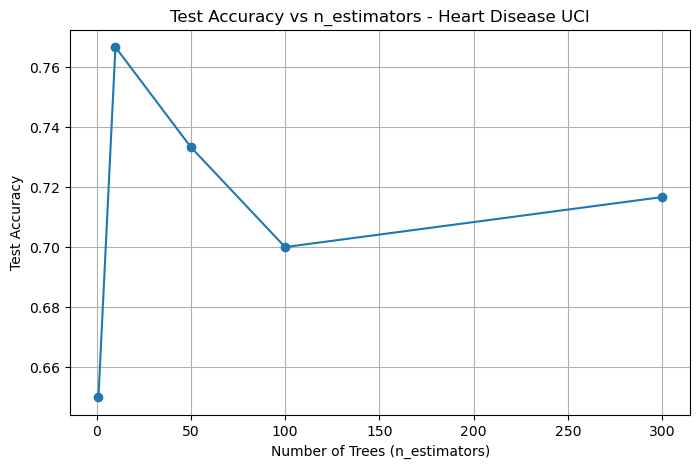


Comparison for Heart Disease UCI:
Decision Tree - Test Accuracy: 0.7667, Training Time: 0.0029 seconds
Random Forest - Test Accuracy: 0.7000, Training Time: 0.2751 seconds


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset from local file
file_path = 'heart_cleveland_upload.csv'  # Update if needed
df = pd.read_csv(file_path, header=0)  # header=0 to use the file's header row
print("Dataset heart_cleveland_upload.csv")
# Rename 'condition' to 'target' for consistency
df = df.rename(columns={'condition': 'target'})

# Preprocessing: Handle missing values ('?') and convert to numeric (though none in this file)
df = df.replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df.fillna(df.median(), inplace=True)

# Convert target to binary (0: no disease, 1: disease) — already seems binary, but ensure
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional scaling (RF doesn't require it, but can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Heart Disease UCI Dataset Experiments")

# Experiment 1: Vary n_estimators and plot test accuracy
estimators = [1, 10, 50, 100, 300]
accuracies_heart = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_heart.append(acc)
    print(f"n_estimators={n}, Test Accuracy={acc:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(estimators, accuracies_heart, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs n_estimators - Heart Disease UCI')
plt.grid(True)
plt.show()

# Experiment 2: Compare Decision Tree vs Random Forest
# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start_time
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forest with default parameters
rf_default = RandomForestClassifier(random_state=42)  # default n_estimators=100
start_time = time.time()
rf_default.fit(X_train, y_train)
rf_train_time = time.time() - start_time
rf_pred = rf_default.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("\nComparison for Heart Disease UCI:")
print(f"Decision Tree - Test Accuracy: {dt_acc:.4f}, Training Time: {dt_train_time:.4f} seconds")
print(f"Random Forest - Test Accuracy: {rf_acc:.4f}, Training Time: {rf_train_time:.4f} seconds")




Dataset  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Heart Disease UCI Dataset Experiments
n_estimators=1, Test Accuracy=0.8197
n_estimators=10, Test Accuracy=0.8525
n_estimators=50, Test Accuracy=0.8852
n_estimators=100, Test Accuracy=0.8689
n_estimators=300, Test Accuracy=0.8689


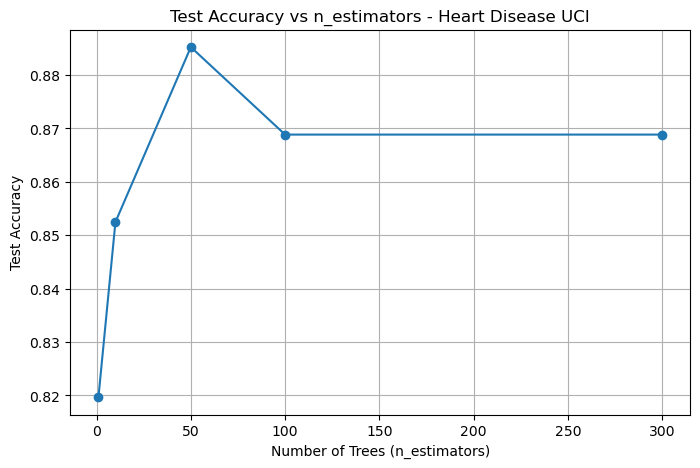


Comparison for Heart Disease UCI:
Decision Tree - Test Accuracy: 0.7541, Training Time: 0.0039 seconds
Random Forest - Test Accuracy: 0.8689, Training Time: 0.2493 seconds


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)
print("Dataset ", url)


# Preprocessing: Handle missing values ('?') and convert to numeric
df = df.replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])
df.fillna(df.median(), inplace=True)

# Convert target to binary (0: no disease, 1: disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

#Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional scaling (RF doesn't require it, but can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Heart Disease UCI Dataset Experiments")

#Experiment 1: Vary n_estimators and plot test accuracy
estimators = [1, 10, 50, 100, 300]
accuracies_heart = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_heart.append(acc)
    print(f"n_estimators={n}, Test Accuracy={acc:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(estimators, accuracies_heart, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs n_estimators - Heart Disease UCI')
plt.grid(True)
plt.show()

#Experiment 2: Compare Decision Tree vs Random Forest
#Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start_time
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forest with default parameters
rf_default = RandomForestClassifier(random_state=42)  # default n_estimators=100
start_time = time.time()
rf_default.fit(X_train, y_train)
rf_train_time = time.time() - start_time
rf_pred = rf_default.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("\nComparison for Heart Disease UCI:")
print(f"Decision Tree - Test Accuracy: {dt_acc:.4f}, Training Time: {dt_train_time:.4f} seconds")
print(f"Random Forest - Test Accuracy: {rf_acc:.4f}, Training Time: {rf_train_time:.4f} seconds")
